# Part 2(a)

In [ ]:
import numpy as np

def find_suitable_matrix(frobenius_target, spectral_target, tolerance=0.01, max_iterations=1000000):
    # Initial matrix with small random values
    np.random.seed(0)  # For reproducibility
    A = np.random.randn(2, 3) / 10

    for _ in range(max_iterations):
        frobenius_norm = np.linalg.norm(A, 'fro')
        spectral_norm = np.linalg.norm(A, 2)

        # Check if norms are within tolerance of the targets
        if abs(frobenius_norm - frobenius_target) < tolerance and abs(spectral_norm - spectral_target) < tolerance:
            return A

        # Adjust the matrix to approach the target Frobenius norm
        A *= frobenius_target / frobenius_norm

        # Randomly adjust an element to vary the spectral norm
        i, j = np.random.randint(0, 2), np.random.randint(0, 3)
        A[i, j] += np.random.uniform(-0.1, 0.1)

    return None  # If a suitable matrix is not found within max_iterations

# Target norms
frobenius_target = np.sqrt(8)
spectral_target = np.sqrt(5)

# Find a suitable matrix
matrix = find_suitable_matrix(frobenius_target, spectral_target)

# Check if a matrix was found and calculate norms if so
if matrix is not None:
    frobenius_norm_result = np.linalg.norm(matrix, 'fro')
    spectral_norm_result = np.linalg.norm(matrix, 2)
else:
    frobenius_norm_result, spectral_norm_result = "Not found", "Not found"

matrix, frobenius_norm_result, spectral_norm_result

## Part 2(b): Visualize of the data as a scatter plot

First, we want to visualize the data as a scatter plot. We want to use [matplotlib.pyplot.scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html). Read the documentation at the hyperlink.

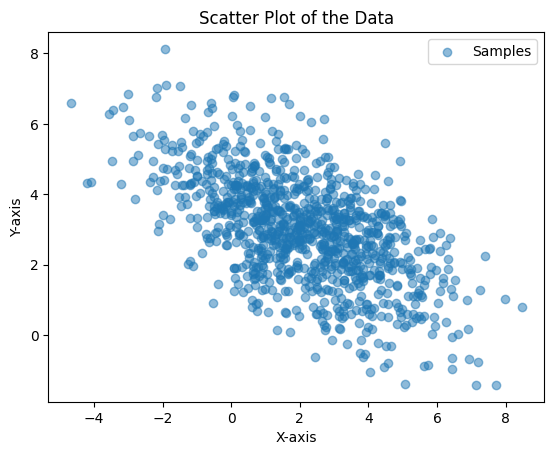

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Load dataset consisting of 1000 data points, each with 2 dimensions
data = np.load("x.npy")
# data is of shape (1000, 2)

# Check if data is of the correct type and shape
assert(isinstance(data, np.ndarray))
assert(data.shape == (1000,2))
assert(data.dtype == np.float64)

# Required: Write code below that produces two variables, data_x and
# data_y, which will be used to generate a scatter plot of the data.
#
# data_x will be plotted on the horizontal axis and data_y will be plotted
# on the vertical axis
#
# Include a screenshot of this part in your PDF submission

#################################################################################
#                               YOUR CODE BELOW                                 #
#################################################################################

data_x = data[:, 0]
data_y = data[:, 1]

#################################################################################
#                                YOUR CODE ABOVE                                #
#################################################################################

# Do not modify the lines below
# Check if data_x and data_y are of the correct type and shape

assert(isinstance(data_x, np.ndarray))
assert(isinstance(data_y, np.ndarray))
assert(data_x.shape == (1000,))
assert(data_y.shape == (1000,))
assert(data_x.dtype == np.float64)
assert(data_y.dtype == np.float64)

# Plot the scatter plot of the given data
plt.scatter(data_x, data_y, label='Samples', alpha=0.5)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot of the Data')
plt.legend()
plt.show()

# Part 2(b): Find the sample mean and sample covariance

In [2]:
# Compute the sample mean and sample covariance of the data
#
# Required: Write code below that produces two variables, sample_mean and
# sample_covariance.
#
# sample_mean should be a 2D vector of type numpy.float64 that represents the
# sample mean
# sample_covariance should be a 2x2 matrix of type numpy.float64 that represents
# the (biased) sample covariance
#
# Include a screenshot of this part in your PDF submission

#################################################################################
#                               YOUR CODE BELOW                                 #
#################################################################################

N = data.shape[0]
sample_mean = np.sum(data, axis=0) / N
sample_covariance = sum([(data[i] - sample_mean).reshape(-1, 1) @ (data[i] - sample_mean).reshape(1, -1) for i in range(N)]) / N

#################################################################################
#                                YOUR CODE ABOVE                                #
#################################################################################

# Do not modify the lines below
# Check if sample_mean and sample_covariance are of the correct type and shape

assert(isinstance(sample_mean, np.ndarray))
assert(isinstance(sample_covariance, np.ndarray))
assert(sample_mean.shape == (2,))
assert(sample_covariance.shape == (2,2))
assert(sample_mean.dtype == np.float64)
assert(sample_covariance.dtype == np.float64)

print("Estimated Mean: \n{}\n\nEstimated Covariance Matrix: \n{}".format(sample_mean, sample_covariance))

# Your estimates should be almost equal to the correct answer

correct_mean = np.array([2.0505466, 2.98359807])
correct_covariance = np.array([[4.34775786, -1.85537588], [-1.85537588,2.26475583]])

np.testing.assert_almost_equal(sample_mean, correct_mean)
np.testing.assert_almost_equal(sample_covariance, correct_covariance)

Estimated Mean: 
[2.0505466  2.98359807]

Estimated Covariance Matrix: 
[[ 4.34775786 -1.85537588]
 [-1.85537588  2.26475583]]


# Part 2(b): Plot the contours of the Gaussian density with the estimated mean and covariance

Now, we want to visualize the Gaussian density as a contour plot. We want to use [matplotlib.pyplot.contour](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html). Read the documentation at the hyperlink. It takes arguments as `X, Y, Z`. X and Y are the coordinates which is suggested to created by [numpy meshgrid](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html), so they both would have shape of `(m, n)`, where m, and is arbitrary. Z should also have the same shape, `(m, n)`.

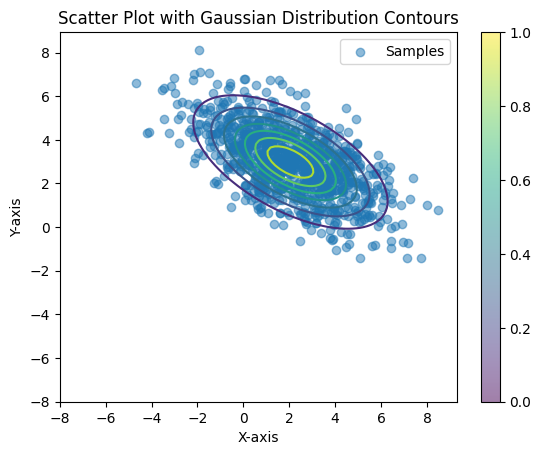

In [3]:
# Coordinates to evaluate the Gaussian density at

n = 100       # Number of x-coordinates
m = 100       # Number of y-coordinates
x, y = np.meshgrid(np.linspace(-8, 8, n), np.linspace(-8, 8, m))
# x shape: (m, n)
# y shape: (m, n)

# Combine x and y-coordinates into tuples of (x,y) coordinates
#
# Required: Write code below that produces a variable, xy
#
# xy should be a matrix of shape (m*n, 2). Each row is a specific (x, y)
# coordinate
# Hint: use numpy column_stack and reshape (or similar solutions)
#
# Include a screenshot of this part in your PDF submission

#################################################################################
#                               YOUR CODE BELOW                                 #
#################################################################################

xy = np.column_stack([x.ravel(), y.ravel()])

#################################################################################
#                                YOUR CODE ABOVE                                #
#################################################################################

# Check if xy is of the correct type and shape

assert(isinstance(xy, np.ndarray))
assert(xy.shape == (m*n, 2))
assert(xy.dtype == np.float64)

# Evaluate the density of the fitted multivariate Gaussian over each point in xy
# array
#
# Required: Write code below that produces a variable, z, that contains the
# density values at the coordinates in xy
# Hint: use scipy.stats.multivariate_normal to compute the density over (x,y)
# pairs
# Hint: don't forget that z should have the shape of (m, n)
#
# Include a screenshot of this part in your PDF submission

#################################################################################
#                               YOUR CODE BELOW                                 #
#################################################################################

z = multivariate_normal(mean=sample_mean, cov=sample_covariance).pdf(xy).reshape(m, n)

#################################################################################
#                                YOUR CODE ABOVE                                #
#################################################################################
# Do not modify the lines below

# Check if z is of the correct type and shape

assert(isinstance(z, np.ndarray))
assert(z.shape == (m, n))
assert(z.dtype == np.float64)

# Plot the contours on top of a scatter plot

plt.contour(x, y, z)
plt.scatter(data_x, data_y, label='Samples', alpha=0.5)
plt.colorbar()
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with Gaussian Distribution Contours')
plt.legend()
plt.show()


# Part 2(c): Rotate and translate the data and the Gaussian density

Now we will rotate and translate the data and the Gaussian density in two different ways.

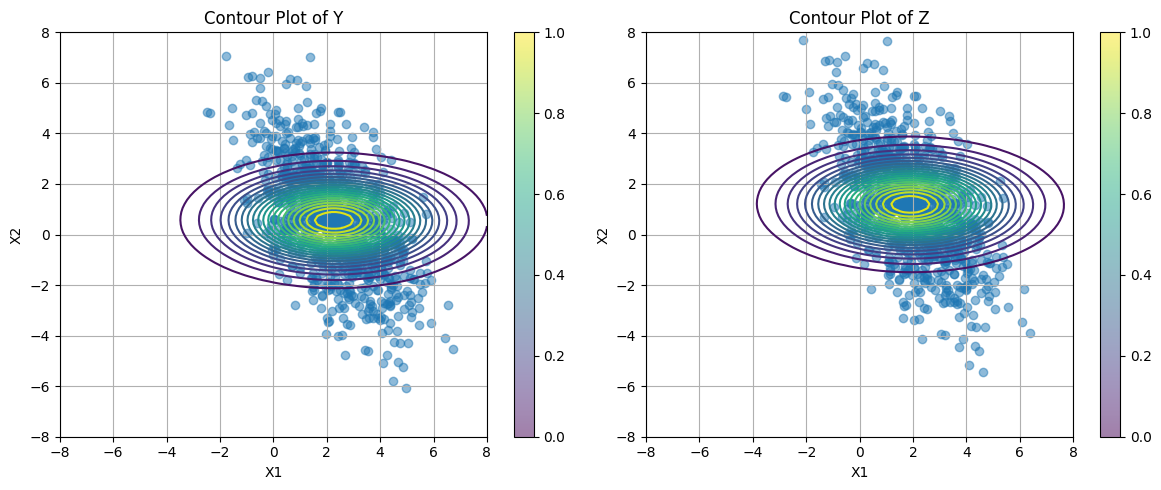

In [5]:
# Calculate A, b, C, d
#
# Required: Write code below to construct A, b, C, d
#
# Include a screenshot of this part in your PDF submission

#################################################################################
#                               YOUR CODE BELOW                                 #
#################################################################################

theta = np.radians(30)
cos_theta, sin_theta = np.cos(theta), np.sin(theta)

A = np.array([[cos_theta, -sin_theta], 
              [sin_theta, cos_theta]])
b = np.array([-1, -1], dtype=np.float64)
C = A.copy()  # Same rotation matrix as A
d = b.copy()  # Same translation vector as b

#################################################################################
#                                YOUR CODE ABOVE                                #
#################################################################################

# Check if A, b, C and d are of the correct type and shape

assert(isinstance(A, np.ndarray))
assert(isinstance(b, np.ndarray))
assert(isinstance(C, np.ndarray))
assert(isinstance(d, np.ndarray))
assert(A.shape == (2, 2))
assert(b.shape == (2,))
assert(C.shape == (2, 2))
assert(d.shape == (2,))
assert(A.dtype == np.float64)
assert(b.dtype == np.float64)
assert(C.dtype == np.float64)
assert(d.dtype == np.float64)

# Transform samples in the data matrix with A, b, C, d to produce Y and Z.
# Y and Z will be used for new scatter plots
#
# Required: Write code below that produces Y and Z
#
# Include a screenshot of this part in your PDF submission

#################################################################################
#                               YOUR CODE BELOW                                 #
#################################################################################

Y = data @ A + b
Z = (data + d) @ C

#################################################################################
#                                YOUR CODE ABOVE                                #
#################################################################################

# Check if the type and shape are correct after transformation

assert(isinstance(Y, np.ndarray))
assert(isinstance(Z, np.ndarray))
assert(Y.shape == (1000, 2))
assert(Z.shape == (1000, 2))
assert(Y.dtype == np.float64)
assert(Z.dtype == np.float64)

# Transform the means and covariances of the data into the means and covariances
# of Y and Z using the Gaussian transformation formulas
#
# Required: Write code below that produces Y_mean, Y_cov, Z_mean and Z_cov,
# which are the means and covariances of Y and Z calculated with the Gaussian
# transformation formulas
#
# Include a screenshot of this part in your PDF submission

#################################################################################
#                               YOUR CODE BELOW                                 #
#################################################################################

Y_mean = sample_mean @ A + b
Y_cov = A @ sample_covariance @ A.T
Z_mean = (sample_mean + d) @ C
Z_cov = C @ sample_covariance @ C.T

#################################################################################
#                                YOUR CODE ABOVE                                #
#################################################################################

# Check if Y_mean, Y_cov, Z_mean and Z_cov are of the correct type and shape

assert(isinstance(Y_mean, np.ndarray))
assert(isinstance(Y_cov, np.ndarray))
assert(isinstance(Z_mean, np.ndarray))
assert(isinstance(Z_cov, np.ndarray))
assert(Y_mean.shape == (2,))
assert(Y_cov.shape == (2, 2))
assert(Z_mean.shape == (2,))
assert(Z_cov.shape == (2, 2))
assert(Y_mean.dtype == np.float64)
assert(Y_cov.dtype == np.float64)
assert(Z_mean.dtype == np.float64)
assert(Z_cov.dtype == np.float64)

# Evaluate the density of the transformed multivariate Gaussian over each point
# in xy array
#
# Required: Write code below that produces pdf_Y and pdf_Z, which contain the
# density values at the coordinates in xy
#
# Include a screenshot of this part in your PDF submission

#################################################################################
#                               YOUR CODE BELOW                                 #
#################################################################################

pdf_Y = multivariate_normal(mean=Y_mean, cov=Y_cov).pdf(xy).reshape(m, n)

pdf_Z = multivariate_normal(mean=Z_mean, cov=Z_cov).pdf(xy).reshape(m, n)

#################################################################################
#                                YOUR CODE ABOVE                                #
#################################################################################

# Do not modify the lines below

# Check if the type and shape are correct after transformation

assert(isinstance(pdf_Y, np.ndarray))
assert(isinstance(pdf_Z, np.ndarray))
assert(pdf_Y.shape == (m, n))
assert(pdf_Z.shape == (m, n))
assert(pdf_Y.dtype == np.float64)
assert(pdf_Z.dtype == np.float64)

# Create contour plots for Y and Z

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.contour(x, y, pdf_Y.reshape(x.shape), levels=20, cmap='viridis')
plt.scatter(Y[:, 0], Y[:, 1], label='Samples', alpha=0.5)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Contour Plot of Y')
plt.colorbar()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.contour(x, y, pdf_Z.reshape(x.shape), levels=20, cmap='viridis')
plt.scatter(Z[:, 0], Z[:, 1], label='Samples', alpha=0.5)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Contour Plot of Z')
plt.colorbar()
plt.grid(True)

plt.tight_layout()
plt.show()

# Part 2(f)

In [ ]:
from math import comb

# Number of people
n_people = 40

# Probability that a pair chooses the same number
p_same = 1/100

# Total number of pairs
total_pairs = comb(n_people, 2)

# Expected number of pairs choosing the same number
expected_pairs_same = total_pairs * p_same
expected_pairs_same

# Part 2(g)

In [ ]:
from scipy.special import comb as scipy_comb

# Number of people
n = 40
# Probability of choosing 50
p = 1 / 100

# Probability that nobody chooses 50
prob_no_one = scipy_comb(n, 0) * (p ** 0) * ((1 - p) ** n)

# Probability that exactly one person chooses 50
prob_one_person = scipy_comb(n, 1) * (p ** 1) * ((1 - p) ** (n - 1))

# Probability that at least two people choose 50
prob_at_least_two = 1 - prob_no_one - prob_one_person
prob_at_least_two